In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

#loading data
parsed_data = pd.read_csv('parsed_data.csv')

# Exploratory Analysis

In [3]:
#info about the parsed data
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72761 entries, 0 to 72760
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72761 non-null  int64  
 1   Unnamed: 0.1    72761 non-null  int64  
 2   Order Date      72761 non-null  object 
 3   Brand           72761 non-null  object 
 4   Sneaker Name    72761 non-null  object 
 5   Release Date    72761 non-null  object 
 6   Shoe Size       72761 non-null  float64
 7   Buyer Region    72761 non-null  object 
 8   Turnover Days   72761 non-null  int64  
 9   Profit          72761 non-null  float64
 10  Profit Ratio    72761 non-null  float64
 11  Model           72761 non-null  object 
 12  Black           72761 non-null  float64
 13  White           72761 non-null  float64
 14  Grey            72761 non-null  float64
 15  Red             72761 non-null  float64
 16  Green           72761 non-null  float64
 17  Neo             72761 non-null 

# Univariate Analysis - Numerical Data

In [4]:
#picking out numerical data
numericalvar=parsed_data[['Shoe Size','Turnover Days','Profit','Profit Ratio']]

In [5]:
#describing our numerical data
numericalvar.describe()

,Shoe Size,Turnover Days,Profit,Profit Ratio
count,72761.000000,72761.000000,72761.000000,72761.00000
mean,9.329201,67.654073,249.265186,1.33050
std,2.346595,86.901757,254.544915,1.48179
min,3.500000,-3.000000,-34.000000,-0.15000
25%,8.000000,7.000000,70.000000,0.32000
50%,9.500000,30.000000,170.000000,0.78000
75%,11.000000,91.000000,356.000000,1.76000
max,17.000000,367.000000,3860.000000,20.32000


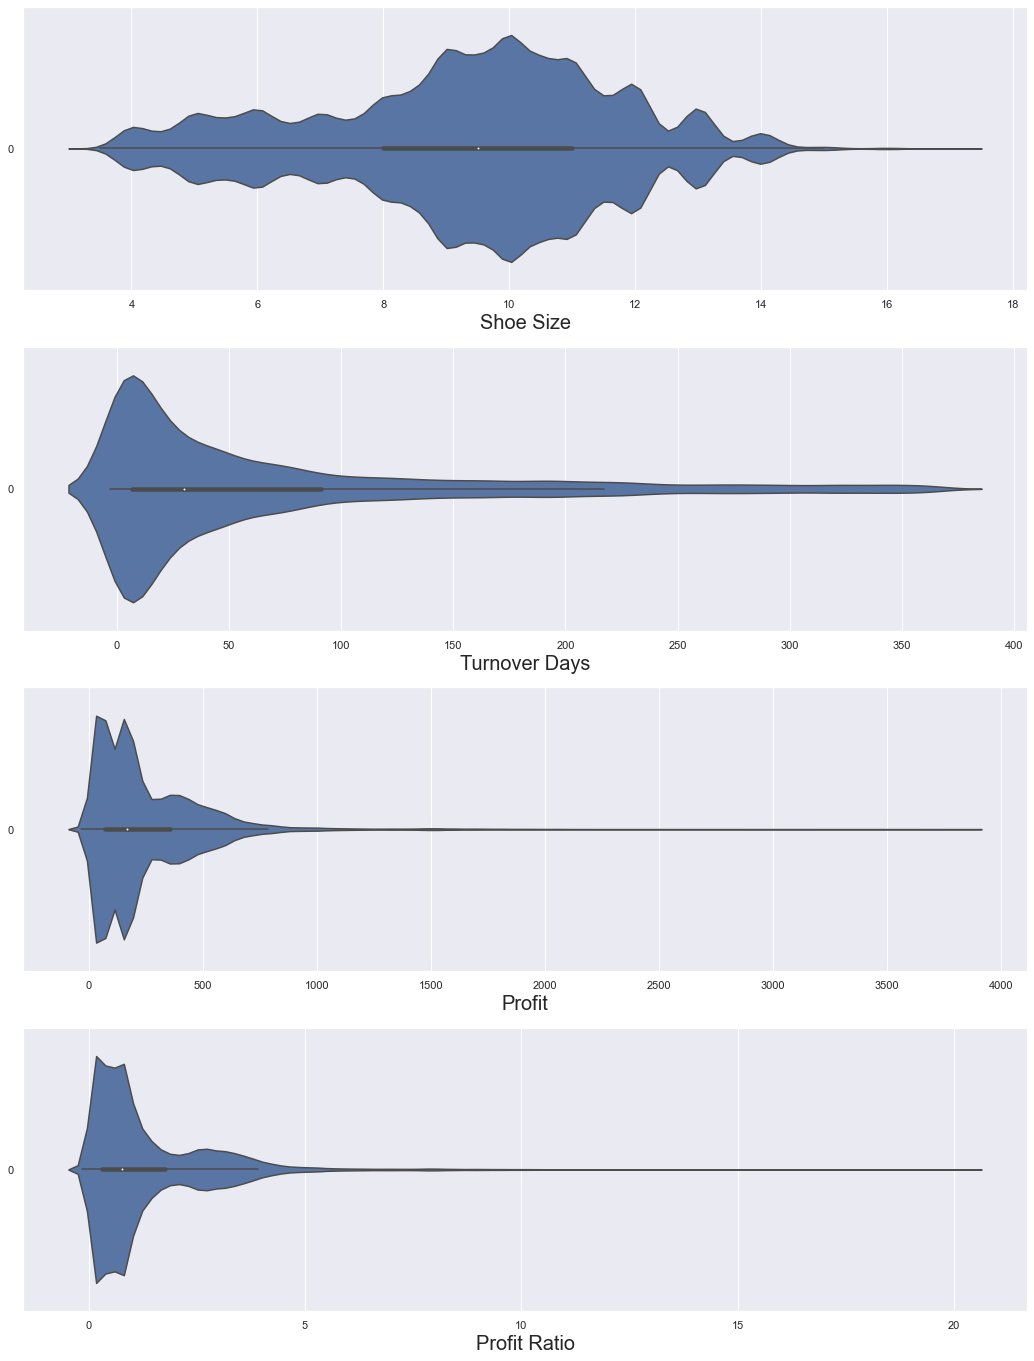

In [6]:
#plotting violin plots for numerical data
f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in numericalvar:
    sb.violinplot(data = numericalvar[var], orient = "h", ax = axes[count])
    ax = axes[count]
    ax.set_xlabel(var,fontsize=20)
    count += 1

# Univariate Analysis - Categorical Data

In [7]:
#picking out categorical data
categoricalvar=parsed_data[['Model','Buyer Region','color']]

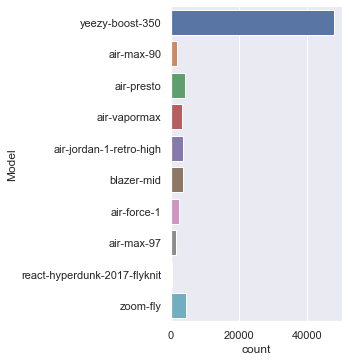

In [8]:
#plotting catplot for shoe models
sb.catplot(y = "Model", data = categoricalvar, kind = "count")

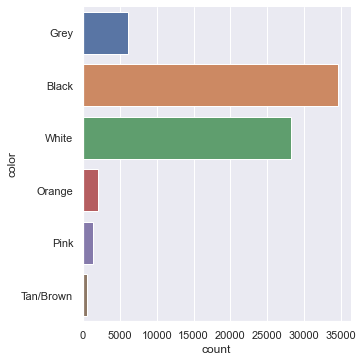

In [9]:
#plotting catplot for shoe colours
sb.catplot(y = "color", data = categoricalvar, kind = "count")

<Figure size 1440x720 with 0 Axes>

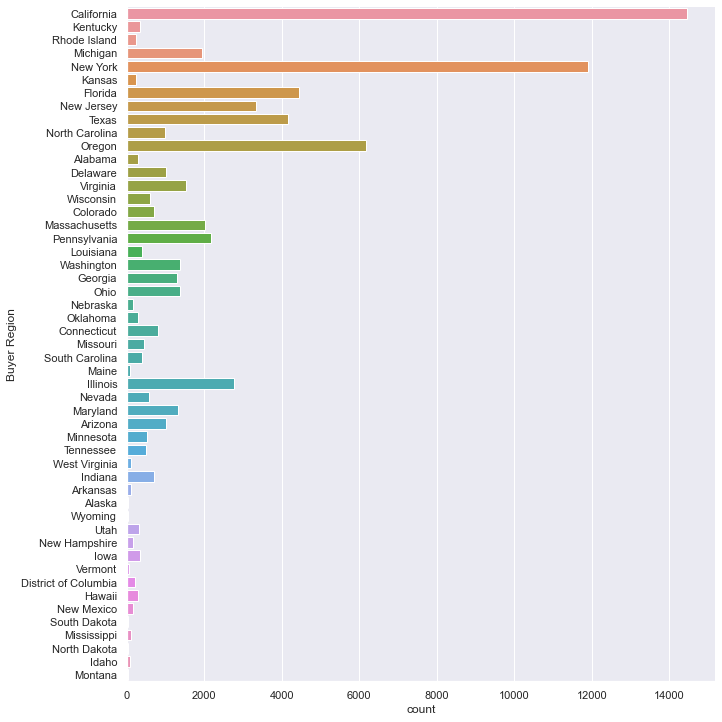

In [10]:
#plotting catplot for buyer regions
plt.figure(figsize=(20,10))
sb.catplot(y = "Buyer Region", data = categoricalvar, kind = "count",height=10, aspect=1)

# Bivariate Analysis

<AxesSubplot:xlabel='Model', ylabel='color'>

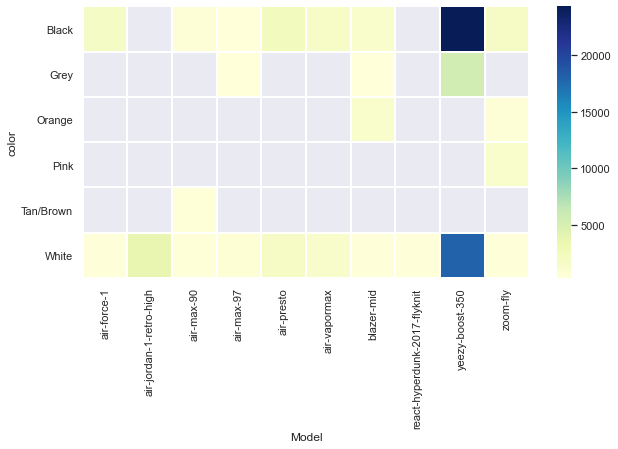

In [11]:
#creating dataframe of colors and model
color_model_data = pd.DataFrame(parsed_data[['color','Model']])
color_model_data.head()

#distribution of colors and models
f = plt.figure(figsize=(10, 5))
sb.heatmap(color_model_data.groupby(['color','Model']).size().unstack(),linewidths=1, cmap = "YlGnBu")

<AxesSubplot:xlabel='Turnover Weeks', ylabel='Profit Ratio'>

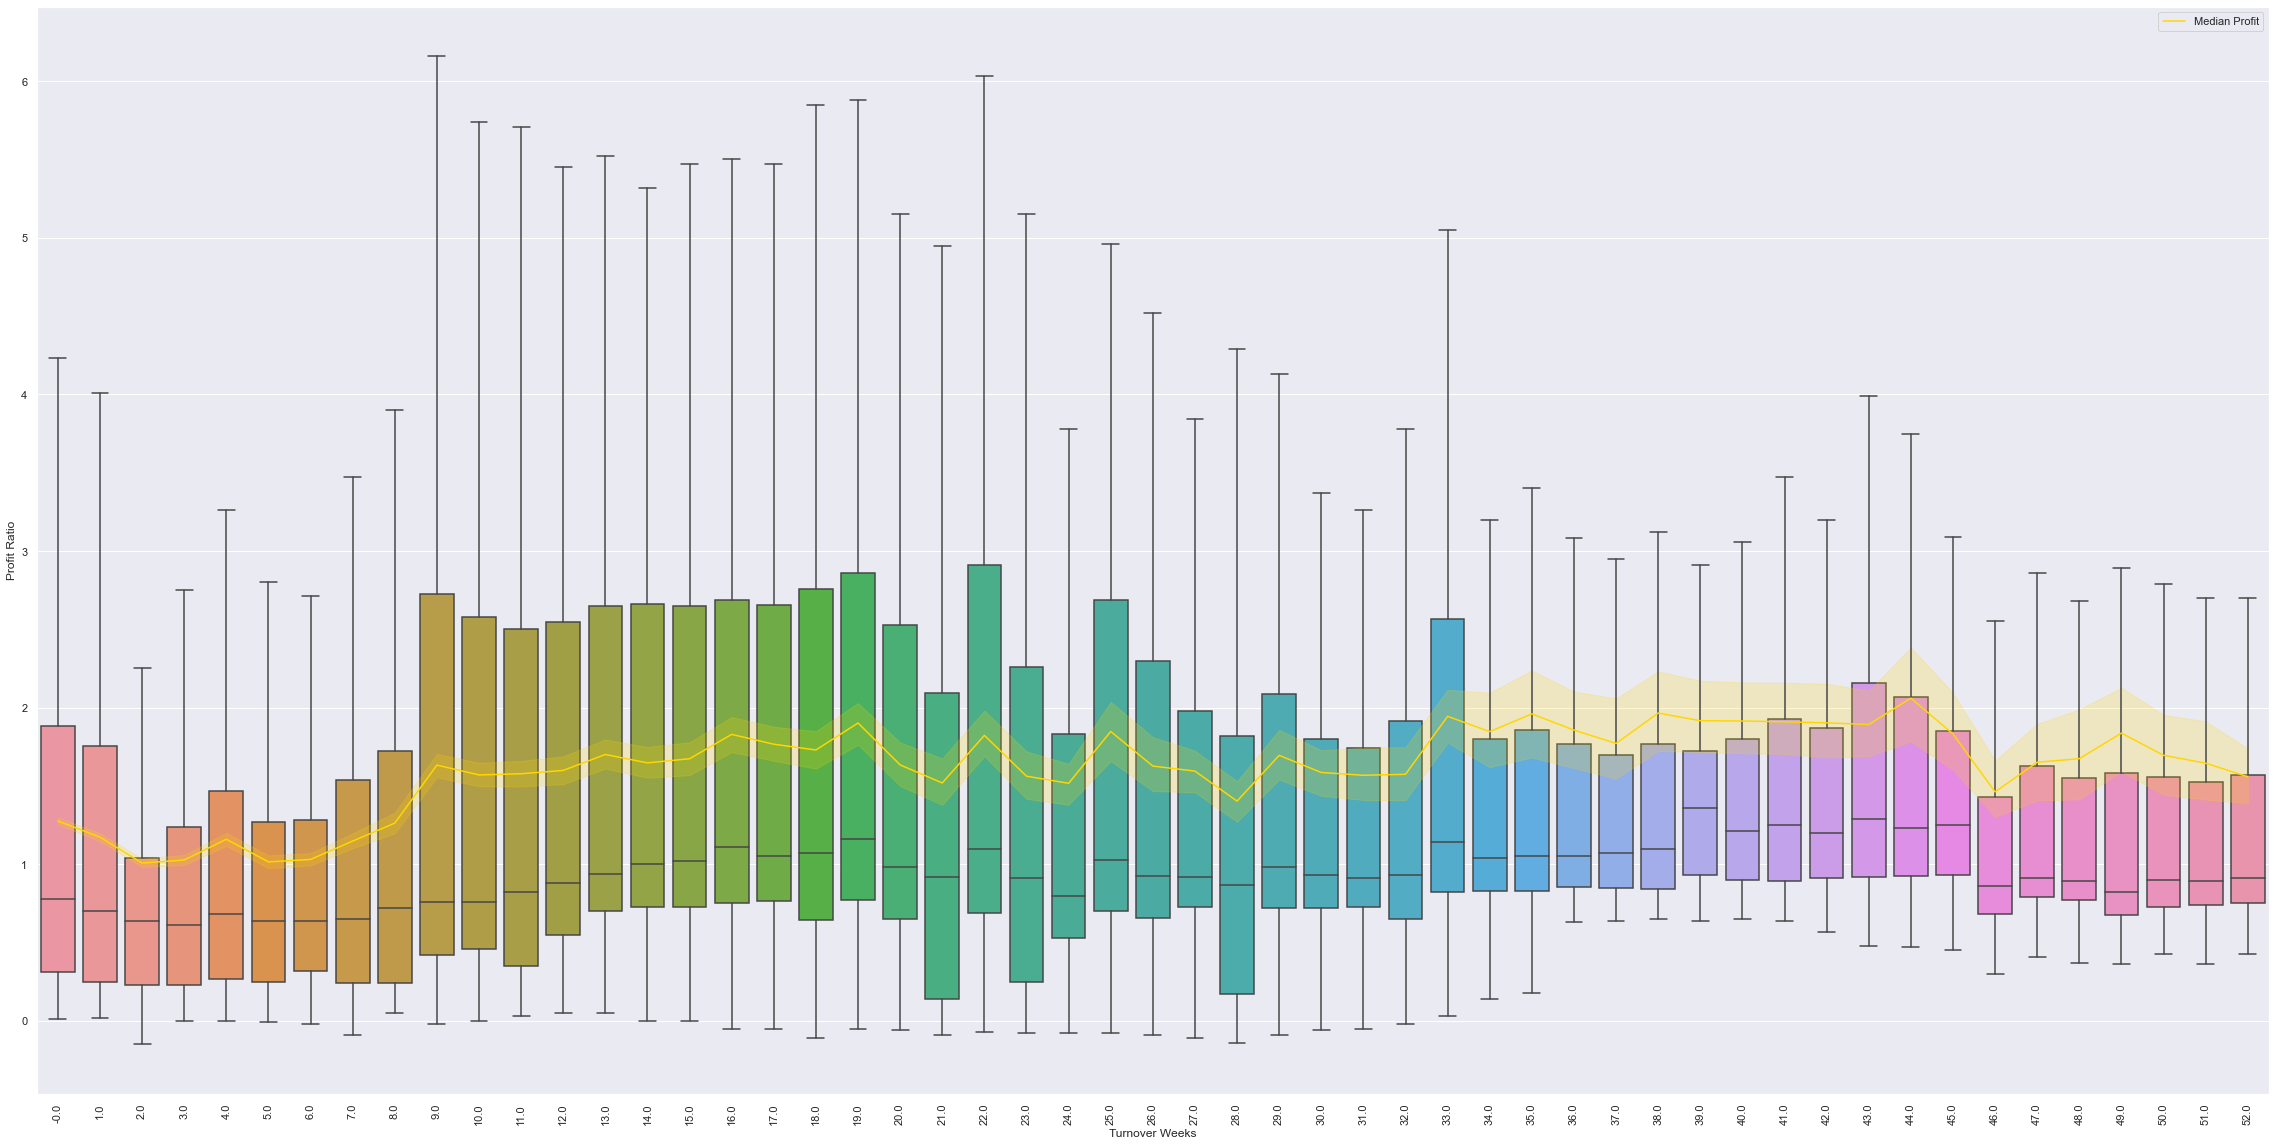

In [12]:
#profitability across turnover weeks
f,axes = plt.subplots(figsize=(40,20))
plt.xticks(rotation=90)
sb.boxplot(x=parsed_data['Turnover Weeks'],y=parsed_data['Profit Ratio'],data=parsed_data,showfliers=False,ax=axes)
sb.lineplot(x=parsed_data['Turnover Weeks'],y=parsed_data['Profit Ratio'],data=parsed_data,color='gold',
            label='Median Profit',ax=axes)

# Multivariate Analysis

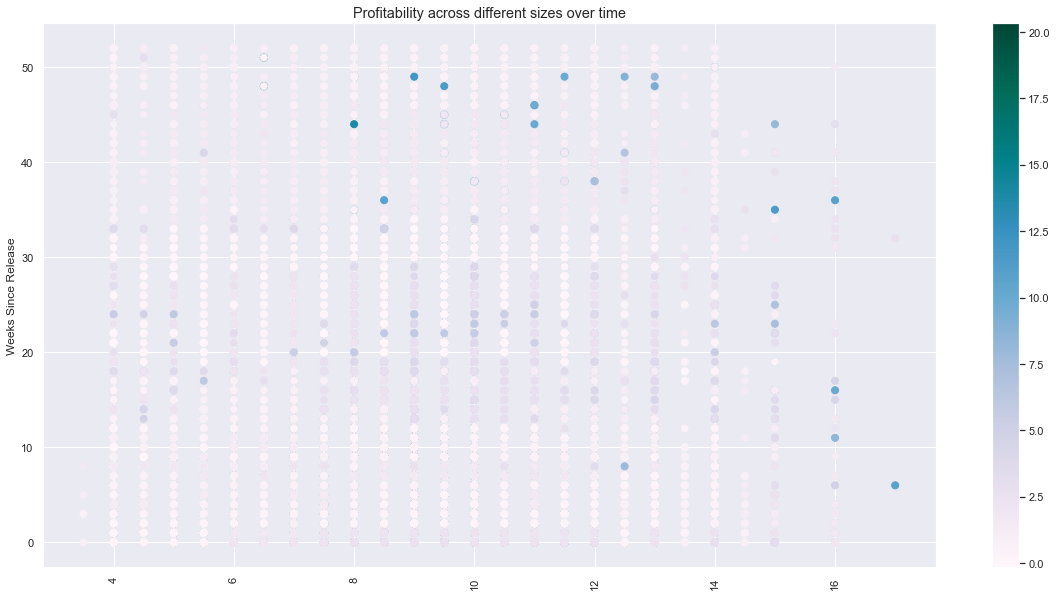

In [13]:
#plotting profit ratio, shoe sizes and turnover weeks
fig, axes = plt.subplots(figsize = (20,10))
plt.xticks(rotation=90)
plot = axes.scatter(x=parsed_data['Shoe Size'],y=parsed_data['Turnover Weeks'], c=parsed_data['Profit Ratio'],
                    cmap='PuBuGn',s=50)
fig.colorbar(plot, ax=axes)
plt.ylabel('Weeks Since Release')
plt.title('Profitability across different sizes over time', fontsize = 'large')
plt.show()

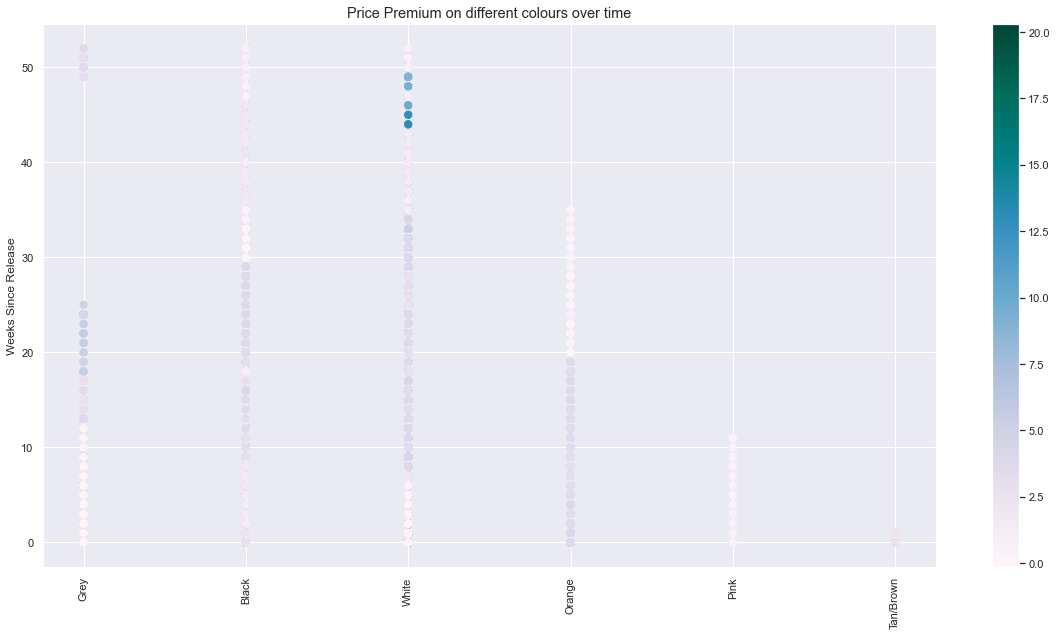

In [14]:
#plotting profit ratio, shoe colours and turnover weeks
fig, axes = plt.subplots(figsize = (20,10))
plt.xticks(rotation=90)
plot = axes.scatter(x=parsed_data['color'],y=parsed_data['Turnover Weeks'], c=parsed_data['Profit Ratio'],cmap='PuBuGn',s=50)
fig.colorbar(plot, ax=axes)
plt.ylabel('Weeks Since Release')
plt.title('Price Premium on different colours over time', fontsize = 'large')
plt.show()

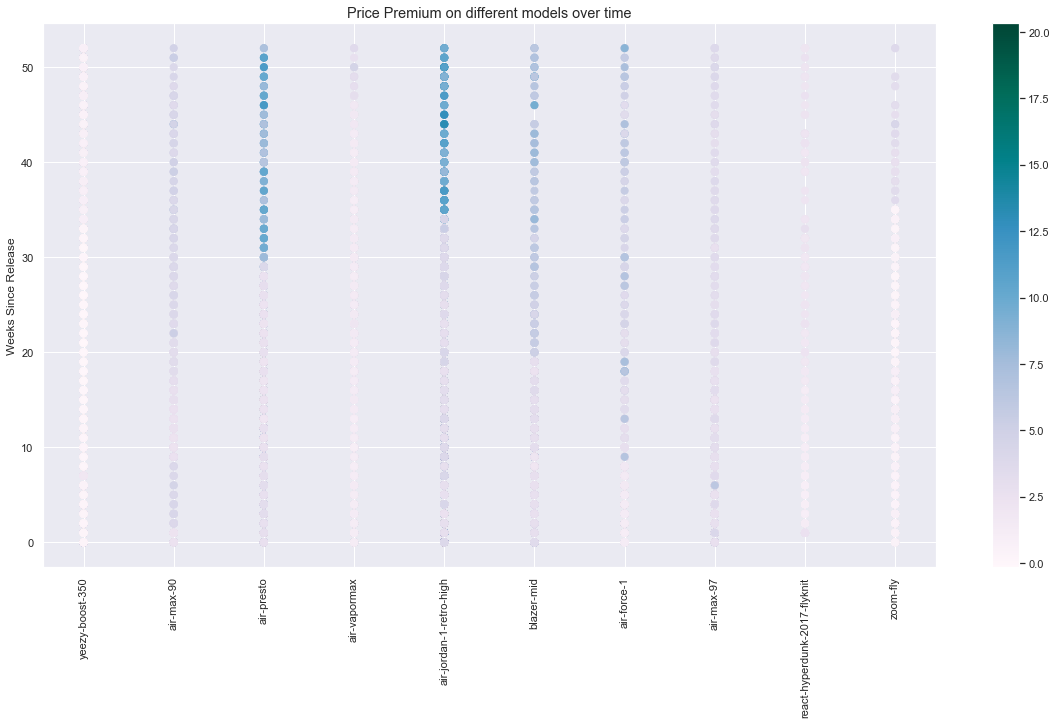

In [15]:
#plotting profit ratio, shoe models and turnover weeks
fig, axes = plt.subplots(figsize = (20,10))
plt.xticks(rotation=90)
plot = axes.scatter(x=parsed_data['Model'],y=parsed_data['Turnover Weeks'], c=parsed_data['Profit Ratio'],cmap='PuBuGn',s=50)
fig.colorbar(plot, ax=axes)
plt.ylabel('Weeks Since Release')
plt.title('Price Premium on different models over time', fontsize = 'large')
plt.show()

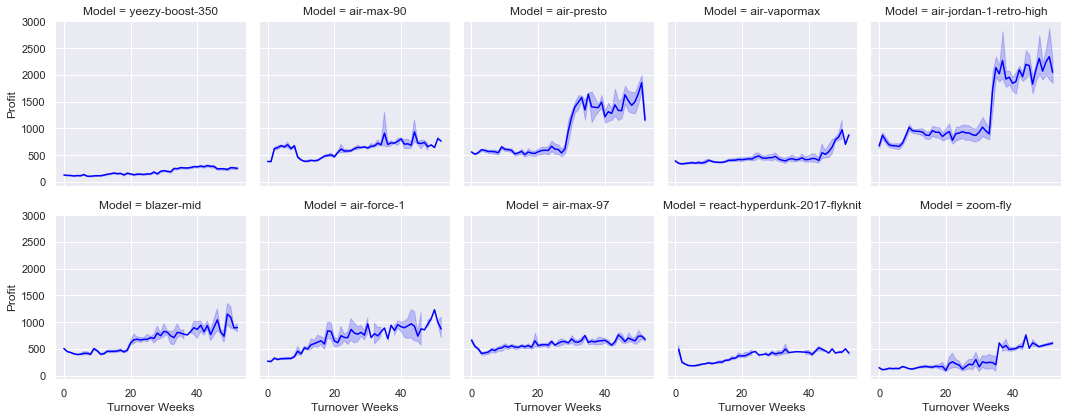

In [16]:
#lineplot of profit ratio, shoe models and turnover weeks
g = sb.FacetGrid(parsed_data, col='Model',col_wrap=5)
g.map(sb.lineplot, 'Turnover Weeks', 'Profit', color='blue')